In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import openMindednessFunctions as omf
import seaborn as sns

In [8]:
df = pd.read_csv('OMdata.csv')
df.head()
# df = df.drop(labels='Unnamed: 0', axis='columns')

,Unnamed: 0,node,timestamp,dataset,opt,opt1,neighbors,opChange,orientation,neighborsOps,error,estOp,openMindedness,nactiveint
0,0,020b020a585a564b52545552,0,euro2020,0.944444,0.944444,"['7c525a55565a49090d0a0f0e020a0c', '7a49565455...",0.000000,Republican,"[0.9411764705882352, 0.9313725490196078, 0.968...",0.000000,0.944444,0.0,0
1,1,020c0a0d0a0b5e,0,euro2020,1.000000,0.666667,['7c5254495c5254575a4b54494f5a'],-0.333333,Republican,[1.0],0.333333,1.000000,0.0,0
2,2,020e0b7a574b5a,0,euro2020,0.333333,0.333333,['565a5f5f5a575e555a090f0c0a'],0.000000,Democrat,[0.5],0.000000,0.333333,0.0,0
3,3,030b724d52,0,euro2020,0.000000,1.000000,['4b5a484a4e525554090b0b0b'],1.000000,Democrat,[1.0],0.500000,0.500000,1.0,1
4,4,030b7a52495a485469030b,0,euro2020,0.333333,0.333333,"['7c5e55785a490e', '6f5a4f5a435a0d']",0.000000,Democrat,"[0.3333333333333333, 0.75]",0.000000,0.333333,0.0,0


In [9]:
df = df.drop('Unnamed: 0', axis=1)

In [56]:
to_save = df[['node', 'openMindedness']]
to_save.to_csv('euro2020_openMindedness.csv')

# Plots for politics dataset

In [25]:
# data = df[df['dataset']=='politics']
data = df[df['openMindedness']>0]

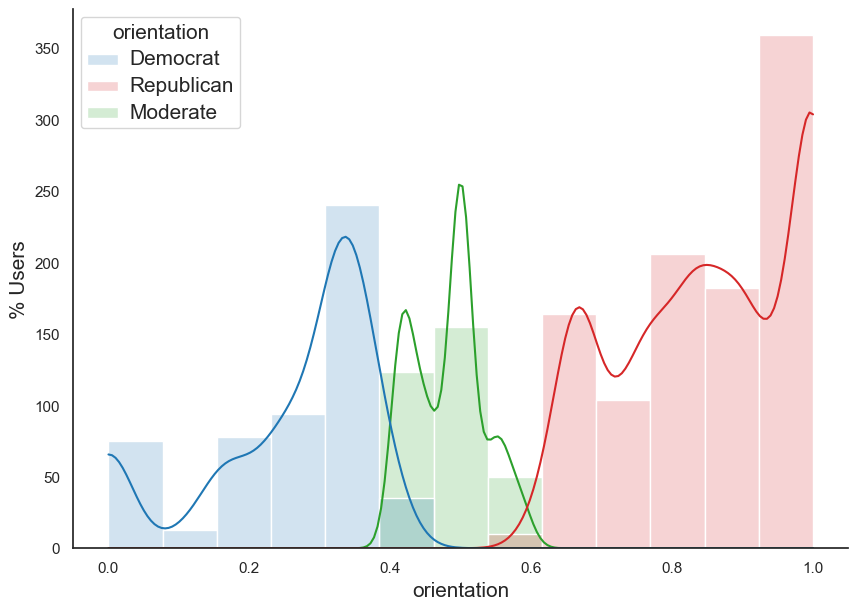

In [26]:
import seaborn as sns
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, ax = plt.subplots( figsize=(10, 7), sharey=True)

g = sns.histplot(data=data, x='opt', hue='orientation', palette=palette, ax=ax, alpha=0.2, stat='count', common_norm=False, kde=True)
g.set_ylabel("% Users", fontsize = 15)
g.set_xlabel("orientation", fontsize = 15)
g.set_xlim(-0.05, 1.05)
#     g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
# yticklabels = g.get_yticks()
# g.set_yticklabels(labels = yticklabels, fontsize=15)
plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
plt.subplots_adjust(hspace=0.5)

plt.show()
plt.close()

Text(0, 0.5, '$\\widehat{CB}$')

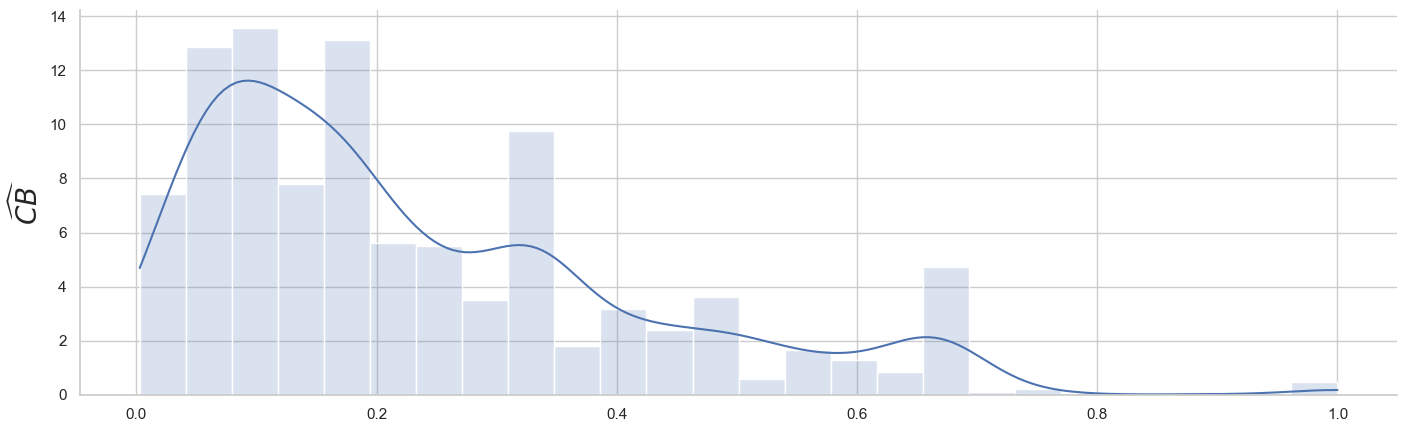

In [33]:
sns.set()
sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
fig, ax = plt.subplots(figsize=(17,5))
g = sns.histplot(data=data, x='openMindedness', ax=ax, alpha=0.2, stat='percent', palette=['tab:orange'], kde=True)
g.set_xlabel("")
g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)

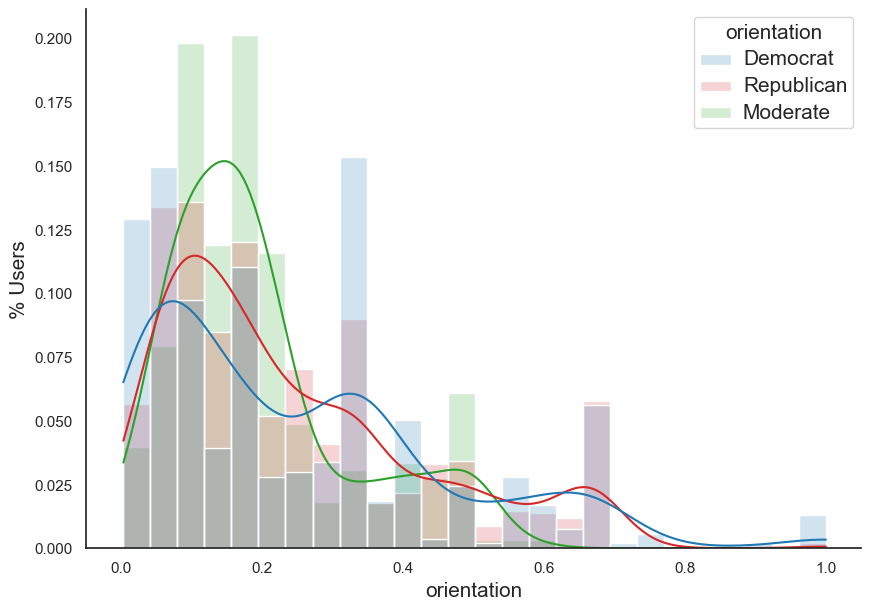

In [57]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, ax = plt.subplots( figsize=(10, 7), sharey=True)

g = sns.histplot(data=data, x='openMindedness', hue='orientation', palette=palette, ax=ax, alpha=0.2, stat='probability', common_norm=False, kde=True)
g.set_ylabel("% Users", fontsize = 15)
g.set_xlabel("orientation", fontsize = 15)
g.set_xlim(-0.05, 1.05)

plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
plt.subplots_adjust(hspace=0.5)

plt.show()
plt.close()

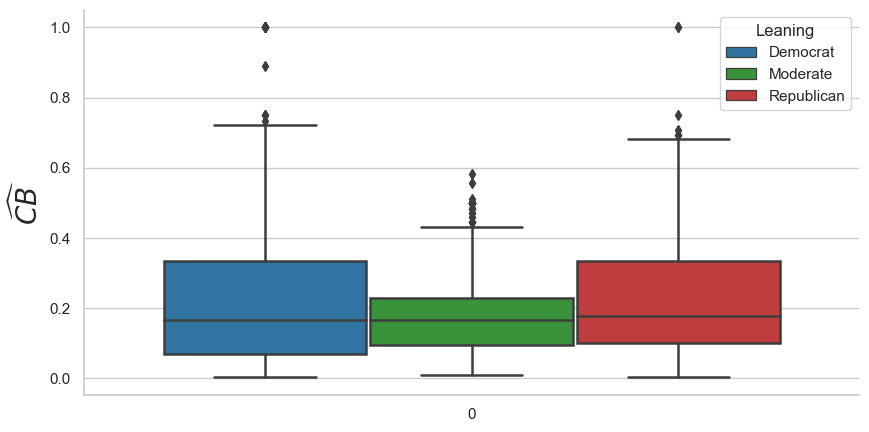

In [29]:
sns.set()
sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
fig, ax = plt.subplots(figsize=(10,5))
g = sns.boxplot(x="timestamp", y="openMindedness", data=data, palette=['tab:blue', 'tab:green', 'tab:red'], linewidth=1.8, ax=ax, hue='orientation', hue_order = ['Democrat', 'Moderate', 'Republican'])
g.set_xlabel("")
g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
plt.legend(loc='upper right', title='Leaning')


In [35]:
print(min(df.openMindedness))
print(max(df.openMindedness))

0.0
1.0


In [26]:
import numpy as np
labels=np.array([['01-07/2017', '07-12/2017'], ['01-07/2018', '01-12/2018']])

# Analisi stabilità OpenMindedness

### Standard deviation

In [36]:
grouped = data.groupby(['node'], as_index=False).agg({'openMindedness':['mean', 'std']})
grouped = grouped.dropna(subset=[('openMindedness', 'std')])
grouped.reset_index()
grouped.head()

Empty DataFrame
Columns: [(node, ), (openMindedness, mean), (openMindedness, std)]
Index: []

In [37]:
newdf = pd.DataFrame()
newdf['node'] = grouped[(   'node',     '')]
newdf['mean_eps'] = grouped[('openMindedness', 'mean')]
newdf['mean_std'] = grouped[('openMindedness', 'std')]
newdf.head()

,node,mean_eps,mean_std


Text(0.5, 0, '$\\widehat{CB}$ user-level standard deviation')

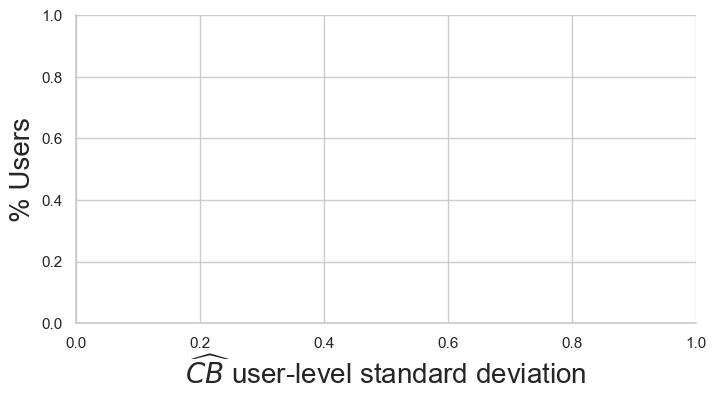

In [38]:
sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
fig, ax = plt.subplots(figsize=(8,4))
g = sns.histplot(data=newdf, x='mean_std', bins=20, kde=True, ax=ax, alpha=1.0, stat='probability')
g.set_ylabel("% Users", fontsize = 20)
g.set_xlabel(r"$\widehat{CB}$ user-level standard deviation", fontsize = 20)

# Distributions

Text(0, 0.5, 'Opinion (t)')

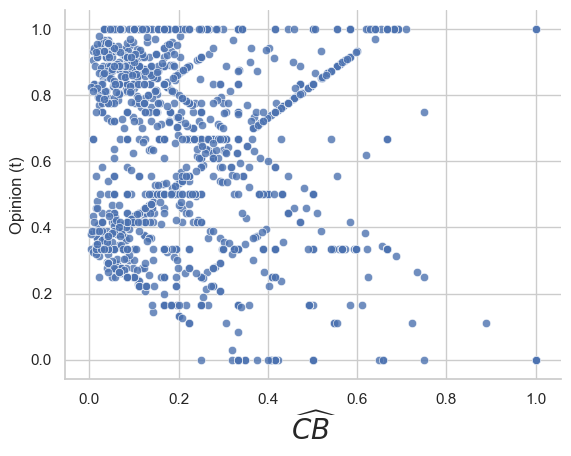

In [39]:
g = sns.scatterplot(data=data, x='openMindedness', y='opt', alpha=0.8, color='b')
g.set_xlabel(r"$\widehat{CB}$", fontsize = 20)
g.set_ylabel("Opinion (t)")

Text(0, 0.5, 'Opinion (t+1)')

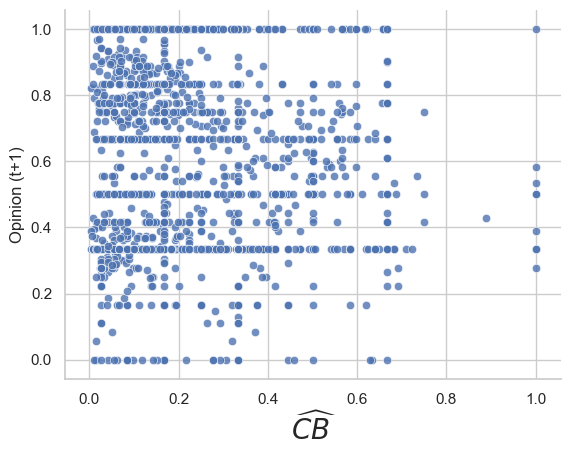

In [40]:
g = sns.scatterplot(data=data, x='openMindedness', y='opt1', alpha=0.8, color='b')
g.set_xlabel(r"$\widehat{CB}$", fontsize = 20)
g.set_ylabel("Opinion (t+1)")

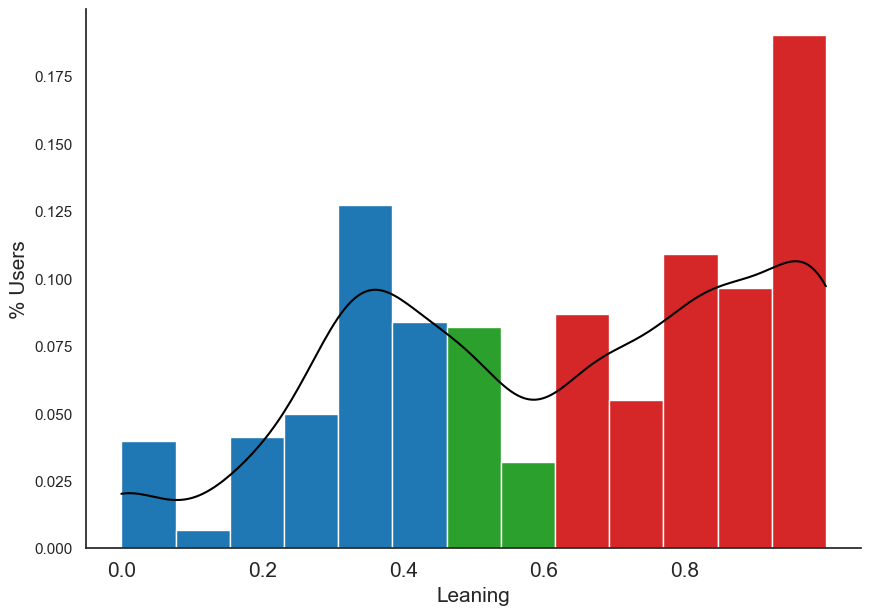

In [42]:
import seaborn as sns
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, ax = plt.subplots(figsize=(10, 7), sharey=True)

# g = sns.histplot(data=tmp, x='opt', kde=True, bins=30, hue='orientation', palette=palette, alpha=0.2, ax=axes[i, j], stat='probability', common_norm=False)
g = sns.histplot(data=data, x='opt', kde=True, color='black', bins='auto', ax=ax, stat='probability', common_norm=False, alpha=0.8)
g.set_ylabel("% Users", fontsize = 15)
g.set_xlabel(r"Leaning", fontsize = 15)
g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
for rectangle in g.patches:
    if rectangle.get_x() < 0.4:
        rectangle.set_facecolor('tab:blue')
    elif rectangle.get_x() > 0.6:
        rectangle.set_facecolor('tab:red')
    else:
        rectangle.set_facecolor('tab:green')
plt.subplots_adjust(hspace=0.5)

plt.show()
plt.close()

## Error distribution log scale

In [37]:
data.columns

Index(['timestamp', 'node', 'dataset', 'opt', 'opt1', 'neighbors', 'opChange',
       'homophily', 'orientation', 'neighborsOps', 'error', 'estOp',
       'openMindedness', 'nactiveint', 'orientation-1', 'date'],
      dtype='object')

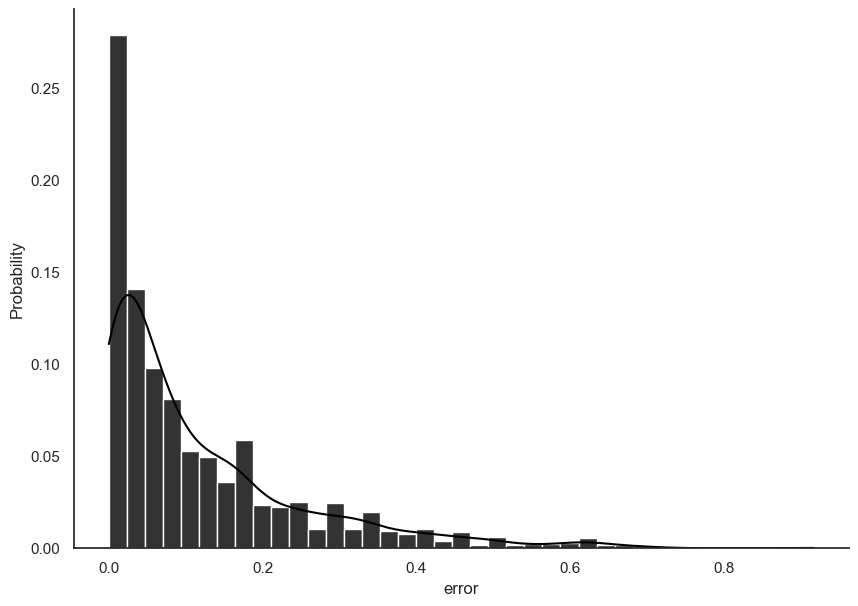

In [44]:
import seaborn as sns
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, ax = plt.subplots(figsize=(10, 7), sharey=True)

# g = sns.histplot(data=tmp, x='opt', kde=True, bins=30, hue='orientation', palette=palette, alpha=0.2, ax=axes[i, j], stat='probability', common_norm=False)
g = sns.histplot(data=data, x='error', kde=True, color='black', bins='auto', ax=ax, stat='probability', common_norm=False, alpha=0.8)

plt.show()
plt.close()

In [46]:
df.error.mean()

0.11160840888782776

# Scatterplots

In [48]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}

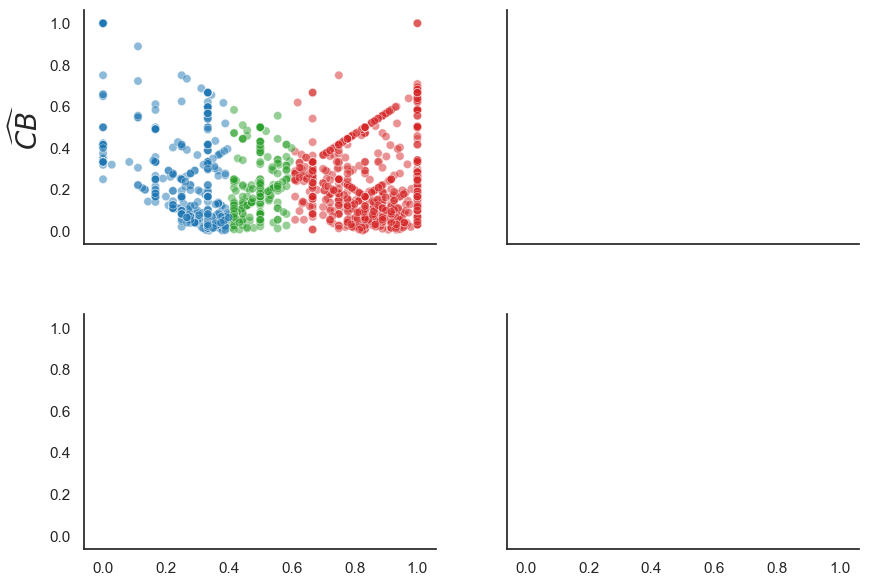

In [49]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.scatterplot(data=tmp, x='opt', y = 'openMindedness', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.5, ax=axes[i, j])    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    g.set_xlabel("Opinion (t)")
    # g.set_ylabel("% Users", fontsize = 15)
    # g.set_xlabel(r"Error (log)", fontsize = 15)
    # g.set_title(f'{timestamp}', fontsize = 15)
    # g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    # plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.3)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()

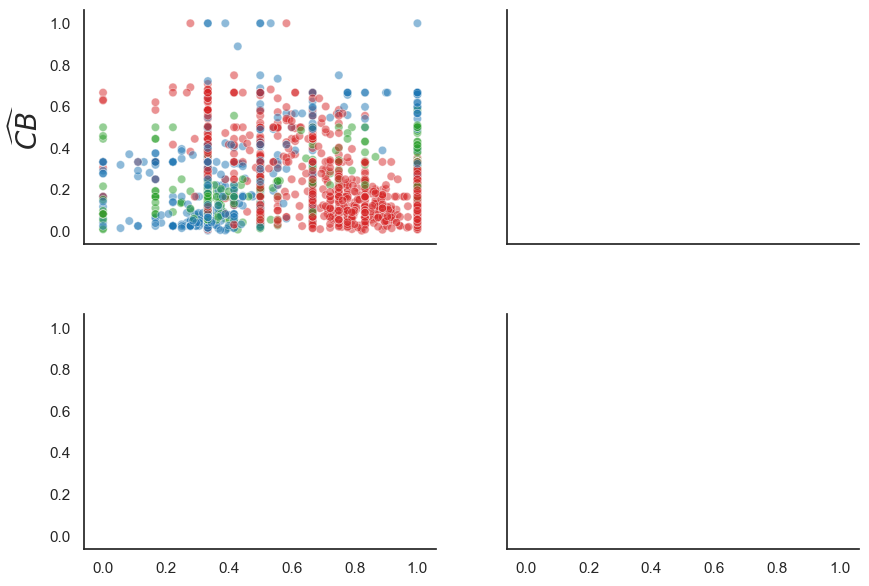

In [50]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.scatterplot(data=tmp, x='opt1', y = 'openMindedness', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.5, ax=axes[i, j])    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    g.set_xlabel("Opinion (t+1)")
    # g.set_ylabel("% Users", fontsize = 15)
    # g.set_xlabel(r"Error (log)", fontsize = 15)
    # g.set_title(f'{timestamp}', fontsize = 15)
    # g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    # plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.3)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning (t)")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()

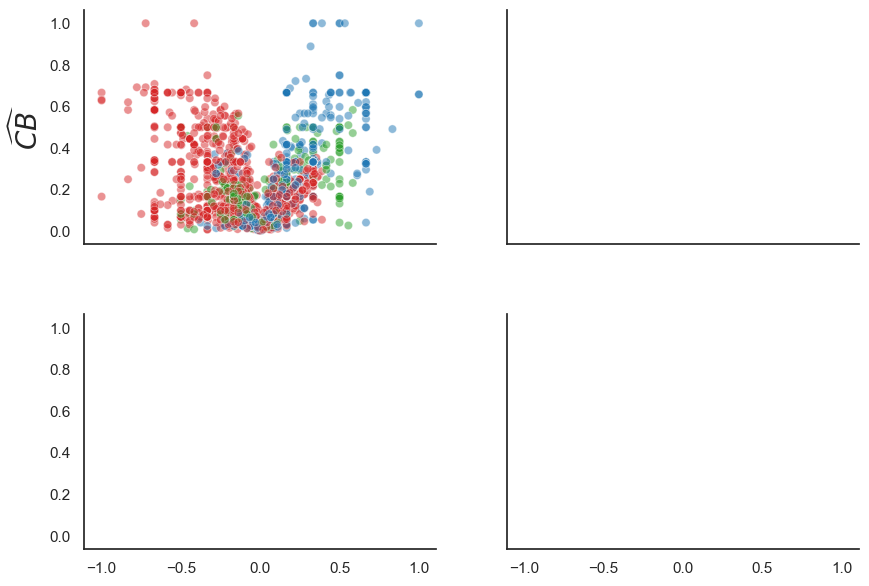

In [51]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.scatterplot(data=tmp, x='opChange', y = 'openMindedness', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.5, ax=axes[i, j])    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    g.set_xlabel("Opinion change")
    # g.set_ylabel("% Users", fontsize = 15)
    # g.set_xlabel(r"Error (log)", fontsize = 15)
    # g.set_title(f'{timestamp}', fontsize = 15)
    # g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    # plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.3)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()


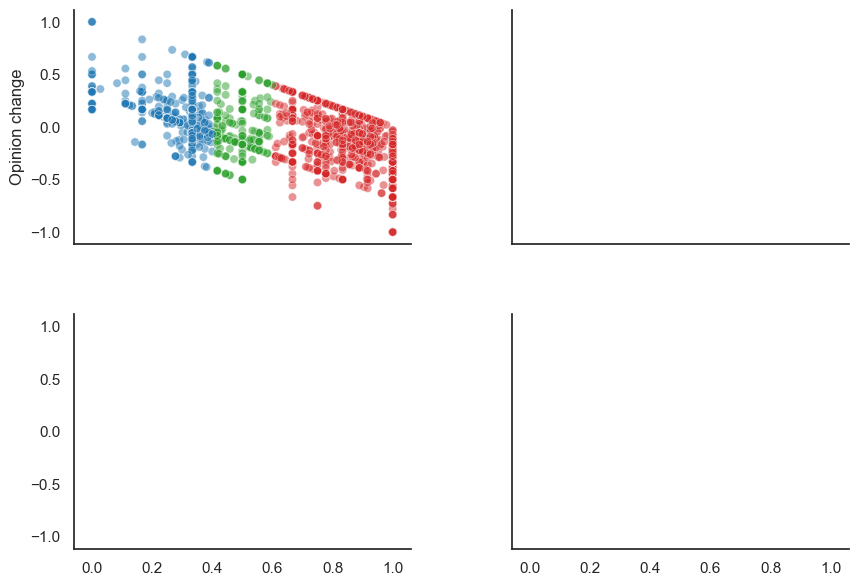

In [52]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.scatterplot(data=tmp, x='opt', y = 'opChange', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.5, ax=axes[i, j])    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel("Opinion change")
    g.set_xlabel("Opinion (t)")
    # g.set_ylabel("% Users", fontsize = 15)
    # g.set_xlabel(r"Error (log)", fontsize = 15)
    # g.set_title(f'{timestamp}', fontsize = 15)
    # g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    # plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()


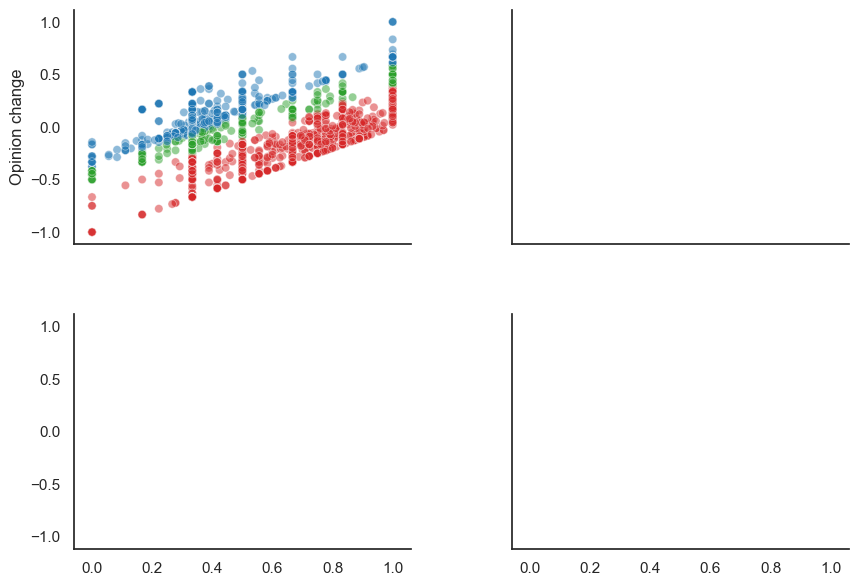

In [53]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.scatterplot(data=tmp, x='opt1', y = 'opChange', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.5, ax=axes[i, j])    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel("Opinion change")
    g.set_xlabel("Opinion (t+1)")
    # g.set_ylabel("% Users", fontsize = 15)
    # g.set_xlabel(r"Error (log)", fontsize = 15)
    # g.set_title(f'{timestamp}', fontsize = 15)
    # g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    # plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning (t)")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()